# Biodiversity across US National Parks: an overview

This project purpose is to analyse two datasets, named **observations** and **species_info**, provided in a **.csv format**. 

Available **data refers to endangered and not endangered species observed in four US National Parks**. 

The goal is to *perform some data analysis* on the conservation statuses of these species and *investigate if there are any patterns or themes to the types of species that become endangered*. 

Let's start by importing the first libraries we are going to need:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np 

Load the **observation.csv** file, get a first glance, check for duplicates and drop them, then print a sample of the dataframe:

In [2]:
observations = pd.read_csv("observations.csv")

In [3]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
observations = observations.drop_duplicates().groupby(["scientific_name", "park_name"])["observations"].sum().reset_index()

In [5]:
observations.head()

,scientific_name,park_name,observations
0,Abies bifolia,Bryce National Park,109
1,Abies bifolia,Great Smoky Mountains National Park,72
2,Abies bifolia,Yellowstone National Park,215
3,Abies bifolia,Yosemite National Park,136
4,Abies concolor,Bryce National Park,83


Do the same for the **species.csv** file:

In [6]:
species_info = pd.read_csv("species_info.csv")

In [7]:
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [8]:
species_info = species_info.drop_duplicates(['scientific_name','conservation_status'])

In [9]:
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


Since *both files have the **scientific_name** column in common*, we can **merge them** using these values:

In [10]:
species_df = pd.merge(observations, species_info, on = "scientific_name").reset_index().drop(['index'], axis=1)

In [11]:
species_df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Abies bifolia,Bryce National Park,109,Vascular Plant,Rocky Mountain Alpine Fir,NaN
1,Abies bifolia,Great Smoky Mountains National Park,72,Vascular Plant,Rocky Mountain Alpine Fir,NaN
2,Abies bifolia,Yellowstone National Park,215,Vascular Plant,Rocky Mountain Alpine Fir,NaN
3,Abies bifolia,Yosemite National Park,136,Vascular Plant,Rocky Mountain Alpine Fir,NaN
4,Abies concolor,Bryce National Park,83,Vascular Plant,"Balsam Fir, Colorado Fir, Concolor Fir, Silver...",NaN


We can see that the majority of values in conservation_status are **NaN**. Let's *get some stats* about this column:

In [12]:
percent_missing = species_df.isnull().sum() * 100 / len(species_df)

In [13]:
print(percent_missing)

scientific_name         0.000000
park_name               0.000000
observations            0.000000
category                0.000000
common_names            0.000000
conservation_status    96.752661
dtype: float64


Since **96.56% of values are missing in this column**, let's **check for unique values** in order to **address the missingness**. Plus, we now know that there are no other missing data!

In [14]:
print(list(species_df["conservation_status"].unique()))

[nan, 'Species of Concern', 'Threatened', 'Endangered', 'In Recovery']


From these values we can infer that **the column actually refers to the measures adopted for endangered species**.

We can then *make an educated guess* and **substitute NaN with "No concern"**. 

In [15]:
species_df["conservation_status"] = species_df['conservation_status'].fillna('No concern')

In [16]:
species_df.drop_duplicates().head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Abies bifolia,Bryce National Park,109,Vascular Plant,Rocky Mountain Alpine Fir,No concern
1,Abies bifolia,Great Smoky Mountains National Park,72,Vascular Plant,Rocky Mountain Alpine Fir,No concern
2,Abies bifolia,Yellowstone National Park,215,Vascular Plant,Rocky Mountain Alpine Fir,No concern
3,Abies bifolia,Yosemite National Park,136,Vascular Plant,Rocky Mountain Alpine Fir,No concern
4,Abies concolor,Bryce National Park,83,Vascular Plant,"Balsam Fir, Colorado Fir, Concolor Fir, Silver...",No concern


Let's check for duplicates in the **conservation status**, which **may vary across parks**:

In [17]:
conservation_status = species_df[species_df.duplicated(subset=['scientific_name','park_name'], keep=False)]

In [18]:
conservation_status.head(10)

,scientific_name,park_name,observations,category,common_names,conservation_status
3216,Canis lupus,Bryce National Park,130,Mammal,Gray Wolf,Endangered
3217,Canis lupus,Bryce National Park,130,Mammal,"Gray Wolf, Wolf",In Recovery
3218,Canis lupus,Great Smoky Mountains National Park,59,Mammal,Gray Wolf,Endangered
3219,Canis lupus,Great Smoky Mountains National Park,59,Mammal,"Gray Wolf, Wolf",In Recovery
3220,Canis lupus,Yellowstone National Park,330,Mammal,Gray Wolf,Endangered
3221,Canis lupus,Yellowstone National Park,330,Mammal,"Gray Wolf, Wolf",In Recovery
3222,Canis lupus,Yosemite National Park,196,Mammal,Gray Wolf,Endangered
3223,Canis lupus,Yosemite National Park,196,Mammal,"Gray Wolf, Wolf",In Recovery
13724,Oncorhynchus mykiss,Bryce National Park,164,Fish,Rainbow Trout,No concern
13725,Oncorhynchus mykiss,Bryce National Park,164,Fish,Rainbow Trout,Threatened


We can see that both Canis lupus and Oncorhynchus mykiss have multiple entries for each park. *Check for all the species which present this characteristic*:

In [19]:
multi_status_species = print(list(conservation_status["scientific_name"].unique()))

['Canis lupus', 'Oncorhynchus mykiss']


A brief **research** allows us to figure out that *Canis lupus is commonly listed as endangered*, and *Oncorhynchus mykiss as no risk to risky situation*. 

Since we have such a complex situation, **we are going for the worst case scenario** and **treat these species as endangered and threatened** respectively, changing their values and, again, dropping duplicates.

In [20]:
species_df[species_df.scientific_name.isin(["Canis lupus"])].replace(to_replace="In Recovery", 
                                                                                  value="Endangered")

,scientific_name,park_name,observations,category,common_names,conservation_status
3216,Canis lupus,Bryce National Park,130,Mammal,Gray Wolf,Endangered
3217,Canis lupus,Bryce National Park,130,Mammal,"Gray Wolf, Wolf",Endangered
3218,Canis lupus,Great Smoky Mountains National Park,59,Mammal,Gray Wolf,Endangered
3219,Canis lupus,Great Smoky Mountains National Park,59,Mammal,"Gray Wolf, Wolf",Endangered
3220,Canis lupus,Yellowstone National Park,330,Mammal,Gray Wolf,Endangered
3221,Canis lupus,Yellowstone National Park,330,Mammal,"Gray Wolf, Wolf",Endangered
3222,Canis lupus,Yosemite National Park,196,Mammal,Gray Wolf,Endangered
3223,Canis lupus,Yosemite National Park,196,Mammal,"Gray Wolf, Wolf",Endangered


In [21]:
species_df[species_df.scientific_name.isin(["Oncorhynchus mykiss"])].replace(to_replace="No concern", 
                                                                                  value="Threatened")

,scientific_name,park_name,observations,category,common_names,conservation_status
13724,Oncorhynchus mykiss,Bryce National Park,164,Fish,Rainbow Trout,Threatened
13725,Oncorhynchus mykiss,Bryce National Park,164,Fish,Rainbow Trout,Threatened
13726,Oncorhynchus mykiss,Great Smoky Mountains National Park,100,Fish,Rainbow Trout,Threatened
13727,Oncorhynchus mykiss,Great Smoky Mountains National Park,100,Fish,Rainbow Trout,Threatened
13728,Oncorhynchus mykiss,Yellowstone National Park,372,Fish,Rainbow Trout,Threatened
13729,Oncorhynchus mykiss,Yellowstone National Park,372,Fish,Rainbow Trout,Threatened
13730,Oncorhynchus mykiss,Yosemite National Park,177,Fish,Rainbow Trout,Threatened
13731,Oncorhynchus mykiss,Yosemite National Park,177,Fish,Rainbow Trout,Threatened


In [22]:
species_df = species_df.drop_duplicates(['scientific_name','park_name'])

We are now going to **get some more insights** on our dataset, regarding **data types**:

In [23]:
print(species_df.dtypes)

scientific_name        object
park_name              object
observations            int64
category               object
common_names           object
conservation_status    object
dtype: object


Since the **observation column** has numbers in it, we are going to check for the minimum value, to be sure we are not dealing with counts adding up to zero:

In [24]:
print((species_df["observations"].min()))

9


No missing values here, that's good news. Move on and check for the **number of unique values in each column**:

In [25]:
for col in species_df:
    print(col, len(species_df[col].unique()))

scientific_name 5541
park_name 4
observations 460
category 7
common_names 5229
conservation_status 5


We have **four parks**, **seven classes** and **five conservation statuses**, which we already saw. 

Let's *print the unique values for the remaining two columns*:

In [26]:
parks = list(species_df["park_name"].unique())
print(parks)

['Bryce National Park', 'Great Smoky Mountains National Park', 'Yellowstone National Park', 'Yosemite National Park']


In [27]:
classes = list(species_df["category"].unique())
print(classes)

['Vascular Plant', 'Nonvascular Plant', 'Bird', 'Amphibian', 'Reptile', 'Mammal', 'Fish']


No spelling errors or strange values here, we can move on.

Let's **add a column** to our DataFrame, named **is_protected**, with the *value True associated with endangered, in recovery, species of concern and threatened statuses reported in the conservation_status column*. 

Again, print the first few rows to check if everything is working as expected:

In [28]:
species_df['is_protected'] = species_df.conservation_status != 'No concern'

In [29]:
species_df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected
0,Abies bifolia,Bryce National Park,109,Vascular Plant,Rocky Mountain Alpine Fir,No concern,False
1,Abies bifolia,Great Smoky Mountains National Park,72,Vascular Plant,Rocky Mountain Alpine Fir,No concern,False
2,Abies bifolia,Yellowstone National Park,215,Vascular Plant,Rocky Mountain Alpine Fir,No concern,False
3,Abies bifolia,Yosemite National Park,136,Vascular Plant,Rocky Mountain Alpine Fir,No concern,False
4,Abies concolor,Bryce National Park,83,Vascular Plant,"Balsam Fir, Colorado Fir, Concolor Fir, Silver...",No concern,False


Let's start with the questions!

### Question n. 1: What is the distribution of "conservation_status" for animals?

Let's **subset our data**, excluding the rows regarding plants...

In [30]:
animals = species_df[~species_df.category.isin(['Vascular Plant', 'Nonvascular Plant'])]
animals.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected
40,Acanthus flammea,Bryce National Park,95,Bird,"Common Redpoll, Redpoll",No concern,False
41,Acanthus flammea,Great Smoky Mountains National Park,68,Bird,"Common Redpoll, Redpoll",No concern,False
42,Acanthus flammea,Yellowstone National Park,241,Bird,"Common Redpoll, Redpoll",No concern,False
43,Acanthus flammea,Yosemite National Park,120,Bird,"Common Redpoll, Redpoll",No concern,False
44,Accipiter cooperii,Bryce National Park,95,Bird,Cooper's Hawk,Species of Concern,True


... and **plot a multi-set bar chart using Python's library Seaborn**. 

We are first going to visualize the number of observations: 

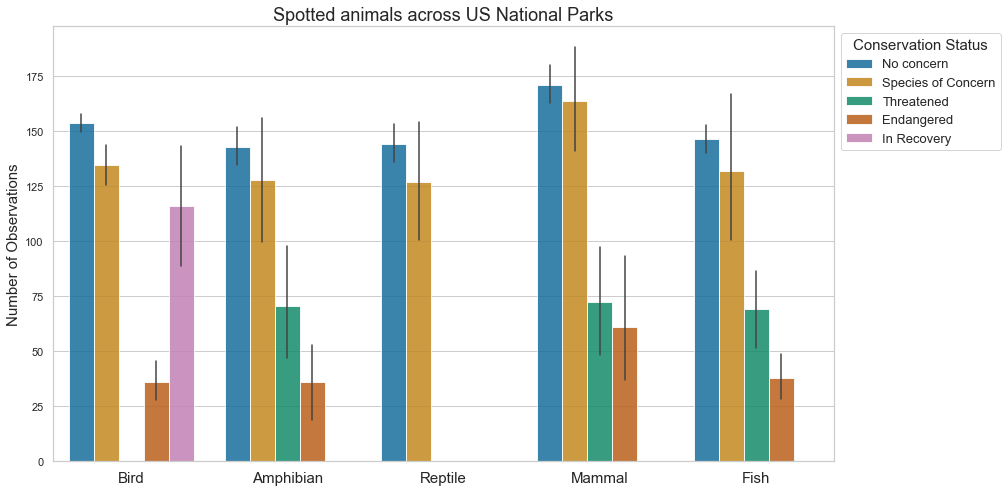

In [31]:
sns.set_theme(style="whitegrid", palette = "colorblind")
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=animals, x="category", y="observations", hue="conservation_status", 
                 errwidth = 1.5, alpha=.85)
ax.set_title("Spotted animals across US National Parks", fontsize = 18)
ax.set_ylabel("Number of Observations", fontsize = 15)
ax.tick_params(axis='x', labelsize=15)
ax.set(xlabel = None)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title = "Conservation Status", fontsize = 13, 
                title_fontsize = 15)
plt.show()

So far, we can tell that:

- Across all parks, the majority of observed animals are species of no concern;

- They are immediately followed by concerned species; 

- Endangered birds, amphibians, mammals and fishes have been spotted quite commonly;

- Threatened amphibians, mammals and fishes have been observed multiple times. 

Let's take one more step, and try to **figure out to how many species we can refer these observations to**:

In [32]:
risk_counts = animals.groupby(['category', 'conservation_status']).scientific_name.nunique().reset_index().pivot(columns='conservation_status',
                                      index='category', values='scientific_name').fillna(0)

In [33]:
risk_counts.columns = ["Endangered", "In recovery", "No concern", "Species of Concern", "Threatened"]

In [34]:
risk_counts

,Endangered,In recovery,No concern,Species of Concern,Threatened
category,,,,,
Amphibian,1.0,0.0,72.0,4.0,2.0
Bird,4.0,3.0,413.0,68.0,0.0
Fish,3.0,0.0,115.0,4.0,3.0
Mammal,6.0,0.0,146.0,22.0,2.0
Reptile,0.0,0.0,73.0,5.0,0.0


### Question n. 2: Which species were spotted the most at each park?

To address this question, we will use **multiple bar plots**, one for each National Park, and show the **ten most commonly spotted species** (ranked highest to lowest) while characterizing our plots with **class-related colors**. 

In [35]:
def most_spotted_species():
    for park in parks: 
        dataset = species_df[species_df.park_name.isin([park])].nlargest(10, "observations", keep = "all")
        plt.figure(figsize=(14, 8))
        ax = sns.barplot(data = dataset, x = "scientific_name", y="observations", 
                         alpha=.85, hue = 'category', dodge = False)
        ax.set_title("Most spotted species in " + park, fontsize = 18)
        ax.set_ylabel("Number of Observations", fontsize = 15)
        ax.tick_params(axis='x', labelsize=15, rotation = 90)
        ax.set(xlabel = None)
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title = "Class", fontsize = 13, 
                title_fontsize = 15)
        plt.show()

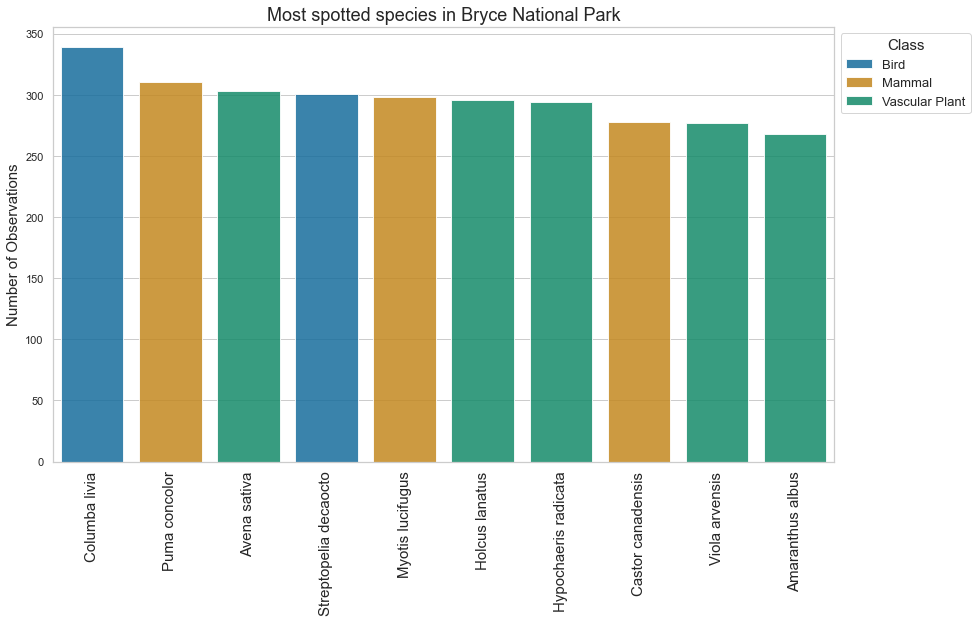

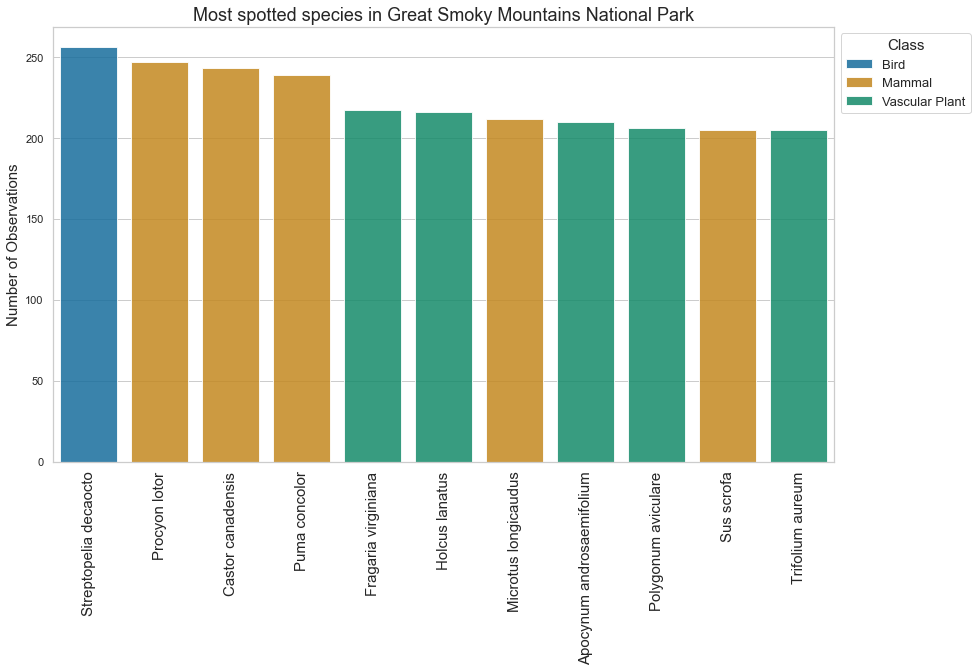

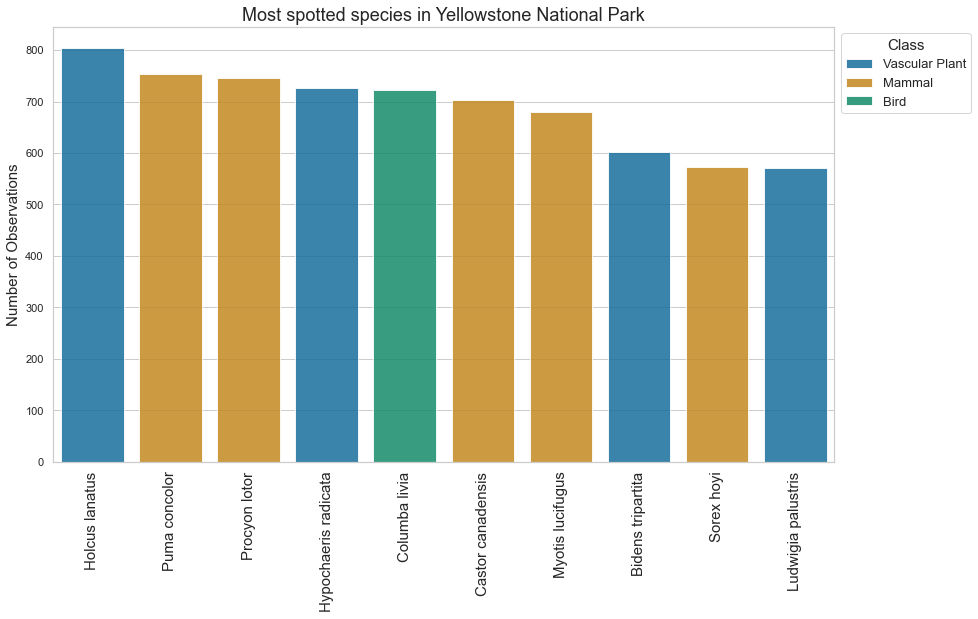

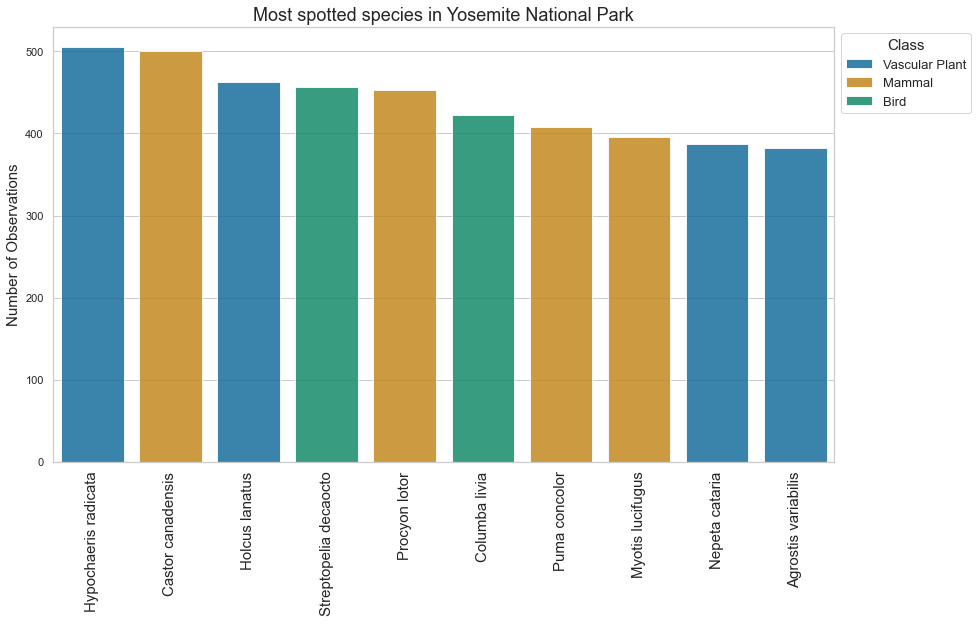

In [36]:
most_spotted_species()

Only one of these species, *Myotis Lucifufus*, a bat, is *currently ranked as species of concern*, and it's been spotted in three out of four National Parks. 

However, **this is only a starting point**: we could try and visualize the ten most spotted mammals, birds, reptiles, amphibians and so on.

### Questions nn. 3 and 4: Are the differences between species and their conservation status significant, and are certain types of species more likely to be endangered?

To answer these questions we are going to use a **Pearson's Chi-Square Test of Independence** and a **Post-Hoc Test** with **multiple testing correction**.

A big thank goes to Dr. Moran Neuhof for making this resource available: https://neuhofmo.github.io/chi-square-and-post-hoc-in-python/

Pearson’s Chi-Square tests, often referred to simply as chi-square tests, are among the most common **nonparametric tests**. Nonparametric tests are *used for data that don’t follow the assumptions of parametric tests*, especially the assumption of a normal distribution.

If you want to **test a hypothesis about the distribution of a categorical variable** you’ll need to use a chi-square test or another nonparametric test. Categorical variables can be nominal or ordinal and represent groupings such as species or nationalities. *Because they can only have a few specific values, they can’t have a normal distribution*.

More about Pearson’s Chi-Square tests at: https://www.scribbr.com/statistics/chi-square-tests/

Grouping by both category and values in is_protected, let's **count the number of species** represented under scientific_name and use these data to build a Pivot Table:

In [37]:
category_counts = species_df.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index().pivot(columns='is_protected',
                                      index='category', values='scientific_name')

In [38]:
category_counts.columns = ['not_protected', 'protected']

In [39]:
category_counts

,not_protected,protected
category,,
Amphibian,72,7
Bird,413,75
Fish,115,10
Mammal,146,30
Nonvascular Plant,328,5
Reptile,73,5
Vascular Plant,4216,46


Above we can see our real recorder values.

What we now want to do is to compare the different groups and get a **p-value** that **tells us whether these groups are actually different than each other**.

In [40]:
from scipy.stats import chi2_contingency

In [41]:
chi2_contingency(category_counts)

(425.65320100839494,
 8.505204582803473e-89,
 6,
 array([[7.64621909e+01, 2.53780906e+00],
        [4.72323407e+02, 1.56765927e+01],
        [1.20984479e+02, 4.01552066e+00],
        [1.70346147e+02, 5.65385310e+00],
        [3.22302653e+02, 1.06973470e+01],
        [7.54943151e+01, 2.50568489e+00],
        [4.12508681e+03, 1.36913193e+02]]))

These are our expected values:

In [42]:
df1 = chi2_contingency(category_counts)[3]
pd.DataFrame(
    data = df1[:,:], 
    index = ["Amphibian", "Bird", "Fish", "Mammal", "Nonvascular Plants", "Reptile", "Vascular Plants"],
    columns = ["not_protected","protected"]
).round(2)

,not_protected,protected
Amphibian,76.46,2.54
Bird,472.32,15.68
Fish,120.98,4.02
Mammal,170.35,5.65
Nonvascular Plants,322.30,10.70
Reptile,75.49,2.51
Vascular Plants,4125.09,136.91


In this case, the **p-value = 8.505204582803473e-89**, looks **pretty significant** and seems to point to *strong evidence against the Null Hypothesis*.

- The Null Hypothesis for this test is that there is no relationship between category and conservation_status; 
- The **Alternative Hypothesis** is that *there is a relationship between category and conservation_status*.

The answer to our first question, **"Are the differences between species and their conservation status significant?"**, is **affirmative**. 

In order to check the differences between each pair of groups, we will **compare every pair separately**.

In [43]:
from statsmodels.sandbox.stats.multicomp import multipletests # for multiple comparisons correction
from itertools import combinations  # for post-hoc tests

In [44]:
def get_asterisks_for_pval(p_val, alpha=0.05):
    """Receives the p-value and returns asterisks string."""
    if p_val > alpha:  # bigger than alpha
        p_text = "ns"
    # following the standards in biological publications
    elif p_val < 1e-4:  
        p_text = '****'
    elif p_val < 1e-3:
        p_text = '***'
    elif p_val < 1e-2:
        p_text = '**'
    else:
        p_text = '*'
    
    return p_text  # string of asterisks

In [45]:
def chisq_and_posthoc_corrected():
    """Receives a dataframe and performs chi2 test and then post hoc.
    Prints the p-values and corrected p-values (after FDR correction)"""
    # start by running chi2 test on the matrix
    chi2, p, dof, ex = chi2_contingency(category_counts, correction=True)
    print(f"Chi2 result of the contingency table: {chi2}, p-value: {p}")
    
    # post-hoc
    all_combinations = list(combinations(category_counts.index, 2))  # gathering all combinations for post-hoc chi2
    p_vals = []
    print("Significance results:")
    for comb in all_combinations:
        new_df = category_counts[(category_counts.index == comb[0]) | (category_counts.index == comb[1])]
        chi2, p, dof, ex = chi2_contingency(new_df, correction=True)
        p_vals.append(p)
        # print(f"For {comb}: {p}")  # uncorrected

    # checking significance
    # correction for multiple testing
    reject_list, corrected_p_vals = multipletests(p_vals, method='fdr_bh')[:2]
    for p_val, corr_p_val, reject, comb in zip(p_vals, corrected_p_vals, reject_list, all_combinations):
        print(f"{comb}: p_value: {p_val:5f}; corrected: {corr_p_val:5f} ({get_asterisks_for_pval(p_val)}) reject: {reject}")

However, since we have performed the test several times, we need to **correct our results for multiple comparisons**. 

To do this we use *statsmodels.sandbox.stats.multicomp.multipletests*: **multipletests** receives a list of p-values (as well as other optional arguments), and returns the respective list of reject decision (reject/do not reject) as well as a list of the corrected p-values.

In statistics, the **multiple comparisons problem** occurs when one considers a set of statistical inferences simultaneously or infers a subset of parameters selected based on the observed values.

The more inferences are made, the more likely erroneous inferences become. Several statistical techniques have been developed to address that problem, typically by requiring a stricter significance threshold for individual comparisons, so as to compensate for the number of inferences being made.

More on the topic here: https://en.wikipedia.org/wiki/Multiple_comparisons_problem

This is our final output:

In [46]:
chisq_and_posthoc_corrected()

Chi2 result of the contingency table: 425.65320100839494, p-value: 8.505204582803473e-89
Significance results:
('Amphibian', 'Bird'): p_value: 0.175936; corrected: 0.230916 (ns) reject: False
('Amphibian', 'Fish'): p_value: 1.000000; corrected: 1.000000 (ns) reject: False
('Amphibian', 'Mammal'): p_value: 0.127577; corrected: 0.178607 (ns) reject: False
('Amphibian', 'Nonvascular Plant'): p_value: 0.001779; corrected: 0.004150 (**) reject: True
('Amphibian', 'Reptile'): p_value: 0.781450; corrected: 0.863708 (ns) reject: False
('Amphibian', 'Vascular Plant'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('Bird', 'Fish'): p_value: 0.047482; corrected: 0.076702 (*) reject: False
('Bird', 'Mammal'): p_value: 0.687595; corrected: 0.802194 (ns) reject: False
('Bird', 'Nonvascular Plant'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('Bird', 'Reptile'): p_value: 0.053135; corrected: 0.079703 (ns) reject: False
('Bird', 'Vascular Plant'): p_value: 0.000000; correc

In order to make our data more readable, let's insert our **observed counts** for protected (real-p) species in a list:

In [47]:
real_p = [7, 75, 10, 30, 5, 5, 46]

Do the same for **predicted counts** (protected = pred_p):

In [48]:
pred_p = [2.54, 15.68, 4.02, 5.65, 10.70, 2.51, 136.91]

Make a **list of labels**, in the *same order* as the entries in the previous lists:

In [49]:
labels = ["Amphibian","Bird","Fish","Mammal", "Nonvascular Plant", "Reptile", "Vascular Plant"]

Use the newly created lists to plot a **multi-set barchart**:

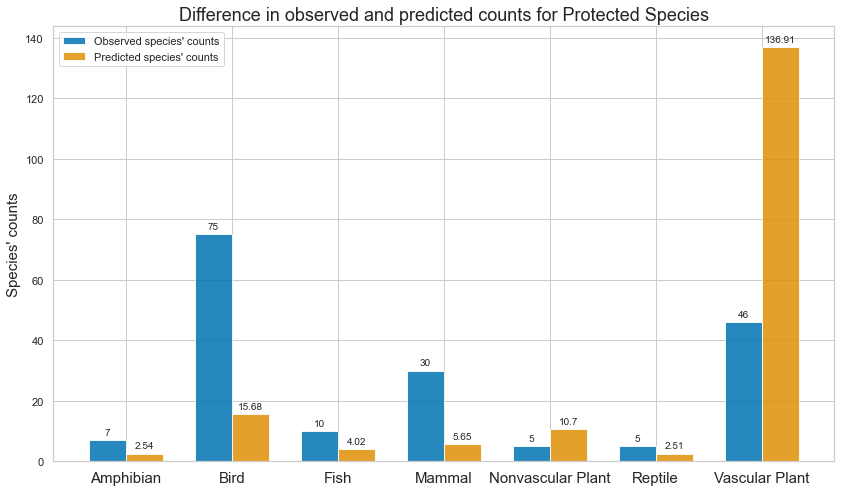

In [50]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (14, 8))
real = ax.bar(x - width/2, real_p, width, label='real_np', alpha=.85)
pred = ax.bar(x + width/2, pred_p, width, label='pred_np', alpha=.85)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Species\' counts', fontsize = 15)
ax.set_title('Difference in observed and predicted counts for Protected Species', fontsize = 18)
ax.set_xticks(x, labels)
ax.tick_params(axis='x', labelsize=15)

l = ax.legend()
l.get_texts()[0].set_text('Observed species\' counts')
l.get_texts()[1].set_text('Predicted species\' counts')


ax.bar_label(real, padding=3)
ax.bar_label(pred, padding=3)

plt.show()

Going back to our p-values, we can see that, despite having a **comprehensive low p-value** (8.505204582803473e-89), which led us to **reject the Null Hypothesis** of a non-existing relationship between species and conservation status, **a more accurate analysis can't confirm this call when looking at animals only**. 

Instead, **when we look at the number of protected animal and plant species, we can conclude that there is a significant statistical difference between these two macro-categories**:

- ('Amphibian', 'Nonvascular Plant'): p_value: 0.001779; corrected: 0.004150 (**) reject: True
- ('Amphibian', 'Vascular Plant'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
- ('Bird', 'Nonvascular Plant'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
- ('Bird', 'Vascular Plant'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
- ('Fish', 'Nonvascular Plant'): p_value: 0.001442; corrected: 0.003785 (**) reject: True
- ('Fish', 'Vascular Plant'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
- ('Mammal', 'Nonvascular Plant'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
- ('Mammal', 'Vascular Plant'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
- ('Reptile', 'Vascular Plant'): p_value: 0.000145; corrected: 0.000435 (***) reject: True

With the only *exception of the couple 'Nonvascular Plant' and 'Reptile' (p_value: 0.033627; corrected: 0.067122, reject: False)*, **animals have, on average, a higher chance of being endangered when compared to plants**, and this answer our second question. 
